<a href="https://colab.research.google.com/github/HowonRyu/ConfidenceSet/blob/main/ConfidenceSet_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import pickle

from confidenceset.random_field_generator import *
from confidenceset.confset import *
from confidenceset.plot import *
from confidenceset.test import *
from confidenceset.simulation import *


# Signals and Confidence Region Demonstration

Different settings of signals and noise, and the corresponding confidence regions



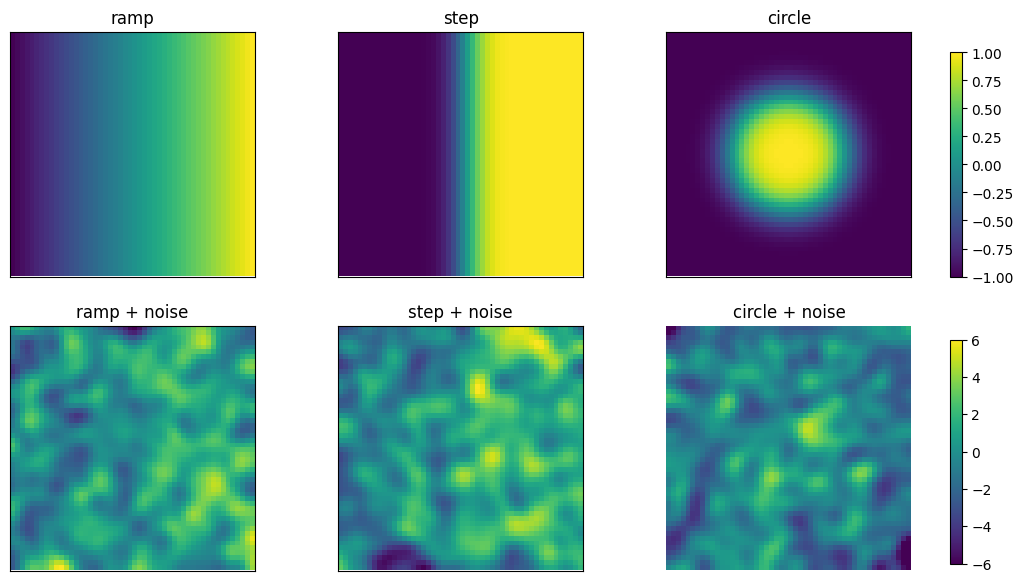

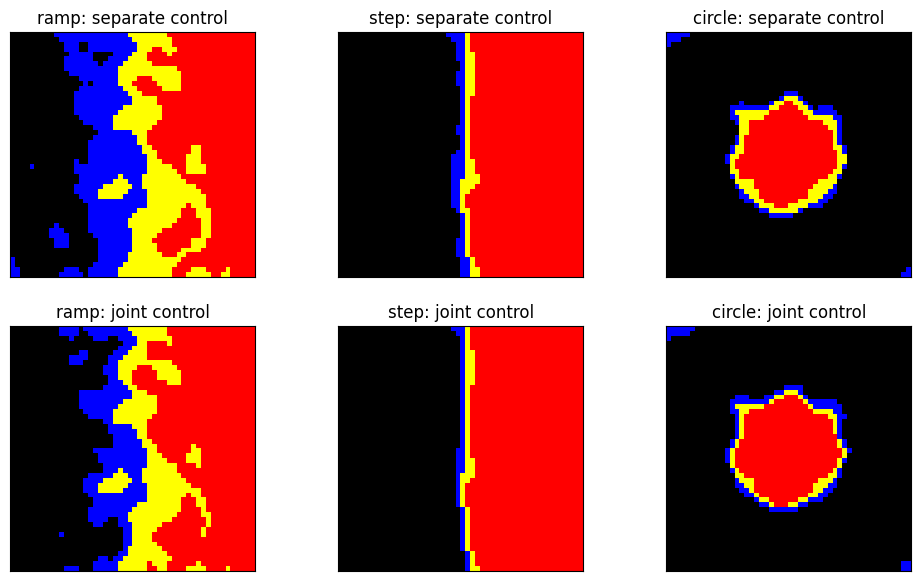

In [15]:
# signal + noise plots
signal_smth = 8
noise_smth = 4
std = 1.5

ramp_spec = {'direction': 1,
                  'mag':(-1,1),
                  'fwhm_noise': noise_smth,
               'std': std}

step_spec = {'fwhm_noise': noise_smth,
             'fwhm_signal' : signal_smth,
             'std': std}

circle_spec = {'r':0.5, 'mag':2, 'background_mag':-1,
                  'fwhm_signal': signal_smth,
                  'fwhm_noise': noise_smth,
                  'std': std}

ramp, ramp_mu = gen_2D((80,50,50), shape="ramp", shape_spec = ramp_spec)
step, step_mu = gen_2D((80,50,50), shape="step", shape_spec = step_spec)
circle, circle_mu = gen_2D((80,50,50), shape="circle", shape_spec = circle_spec)

fontsize = 12
figsize = (12, 7)

fig, axs = plt.subplots(2, 3, figsize=figsize)
plt.axis('off')
im = axs[0,0].imshow(ramp_mu)
axs[0,0].set_title("ramp", fontsize = fontsize)
#fig.colorbar(im, ax=axs[0, 0])
im = axs[0,1].imshow(step_mu)
axs[0,1].set_title("step", fontsize = fontsize)
im = axs[0,2].imshow(circle_mu)
axs[0,2].set_title("circle", fontsize = fontsize)

cbar_ax1 = fig.add_axes([0.92, 0.53, 0.01, 0.32])  # [left, bottom, width, height]
cbar1 = fig.colorbar(im, cax=cbar_ax1)
im.set_clim(vmin=-1, vmax=1)


im = axs[1,0].imshow(ramp[0,:,:])
axs[1,0].set_title("ramp + noise", fontsize = fontsize)
im = axs[1,1].imshow(step[0,:,:])
axs[1,1].set_title("step + noise", fontsize = fontsize)
im = axs[1,2].imshow(circle[0,:,:])
axs[1,2].set_title("circle + noise", fontsize = fontsize)

cbar_ax2 = fig.add_axes([0.92, 0.12, 0.01, 0.32])  
cbar2 = fig.colorbar(im, cax=cbar_ax2)
im.set_clim(vmin=-6, vmax=6)
axs = axs.ravel()  # Convert axs to a 1D array
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


# confset plot

ramp_lower, ramp_upper, ramp_Achat, _, _ = fdr_confset(data=ramp, threshold=0, method="separate_adaptive", alpha=0.05,
             k=2, alpha0=0.05 / 4, alpha1=0.05 / 2)

step_lower, step_upper, step_Achat, _, _ = fdr_confset(data=step, threshold=0, method="separate_adaptive", alpha=0.05,
             k=2, alpha0=0.05 / 4, alpha1=0.05 / 2)
circle_lower, circle_upper, circle_Achat, _, _ = fdr_confset(data=circle, threshold=0, method="separate_adaptive", alpha=0.05,
             k=2, alpha0=0.05 / 4, alpha1=0.05 / 2)

ramp_lower2, ramp_upper2, ramp_Achat2, _, _ = fdr_confset(data=ramp, threshold=0, method="joint", alpha=0.1,
             k=2, alpha0=0.1 / 4, alpha1=0.1 / 2)

step_lower2, step_upper2, step_Achat2, _, _ = fdr_confset(data=step, threshold=0, method="joint", alpha=0.1,
             k=2, alpha0=0.1 / 4, alpha1=0.1 / 2)
circle_lower2, circle_upper2, circle_Achat2, _, _ = fdr_confset(data=circle, threshold=0, method="joint", alpha=0.1,
             k=2, alpha0=0.1 / 4, alpha1=0.1 / 2)




fig, axs = plt.subplots(2, 3, figsize=figsize)
cmap1 = colors.ListedColormap(['black', 'blue'])
cmap2 = colors.ListedColormap(['none', 'yellow'])
cmap3 = colors.ListedColormap(['none', 'red'])

im = axs[0,0].imshow(ramp_lower, cmap=cmap1)
im = axs[0,0].imshow(ramp_Achat, cmap=cmap2)
im = axs[0,0].imshow(ramp_upper, cmap=cmap3)
axs[0,0].set_title("ramp: separate control", fontsize = fontsize)

im = axs[0,1].imshow(step_lower, cmap=cmap1)
im = axs[0,1].imshow(step_Achat, cmap=cmap2)
im = axs[0,1].imshow(step_upper, cmap=cmap3)
axs[0,1].set_title("step: separate control", fontsize = fontsize)

im = axs[0,2].imshow(circle_lower, cmap=cmap1)
im = axs[0,2].imshow(circle_Achat, cmap=cmap2)
im = axs[0,2].imshow(circle_upper, cmap=cmap3)
axs[0,2].set_title("circle: separate control", fontsize = fontsize)


im = axs[1,0].imshow(ramp_lower2, cmap=cmap1)
im = axs[1,0].imshow(ramp_Achat2, cmap=cmap2)
im = axs[1,0].imshow(ramp_upper2, cmap=cmap3)
axs[1,0].set_title("ramp: joint control", fontsize = fontsize)

im = axs[1,1].imshow(step_lower2, cmap=cmap1)
im = axs[1,1].imshow(step_Achat2, cmap=cmap2)
im = axs[1,1].imshow(step_upper2, cmap=cmap3)
axs[1,1].set_title("step: joint control", fontsize = fontsize)

im = axs[1,2].imshow(circle_lower2, cmap=cmap1)
im = axs[1,2].imshow(circle_Achat2, cmap=cmap2)
im = axs[1,2].imshow(circle_upper2, cmap=cmap3)
axs[1,2].set_title("circle: joint control", fontsize = fontsize)

axs = axs.ravel()  # Convert axs to a 1D array
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()






## Different Methods for Error Control
Here, we explore how different methods and alpha level affects the confidence regions Used k=2, $\alpha_0 = 0.05/4$, $\alpha_1 = 0.05/2$ for joint

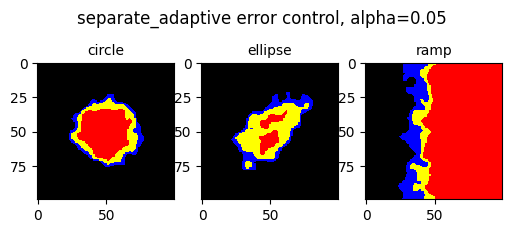

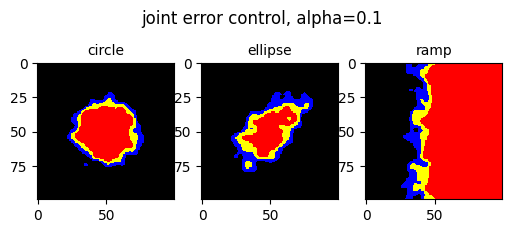

In [16]:
fn = 6
fs = 40
figsize = (6,2.5)
mag=5
std = 1.5
conf_plot_agg(threshold=2, method="separate_adaptive", seed=1004, std=std, mag=mag, fwhm_noise=fn, fwhm_signal=fs,  fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg(threshold=2, method="joint", seed=1004, std=std, mag=mag, fwhm_noise=fn, fwhm_signal=fs,  fontsize=10, alpha=0.1, figsize = figsize)


# FDR Simulations

Simulation outcomes are saved in `sim_result/{FDR/FNDR}_{signal}.pkl`.


## Simulation Signals

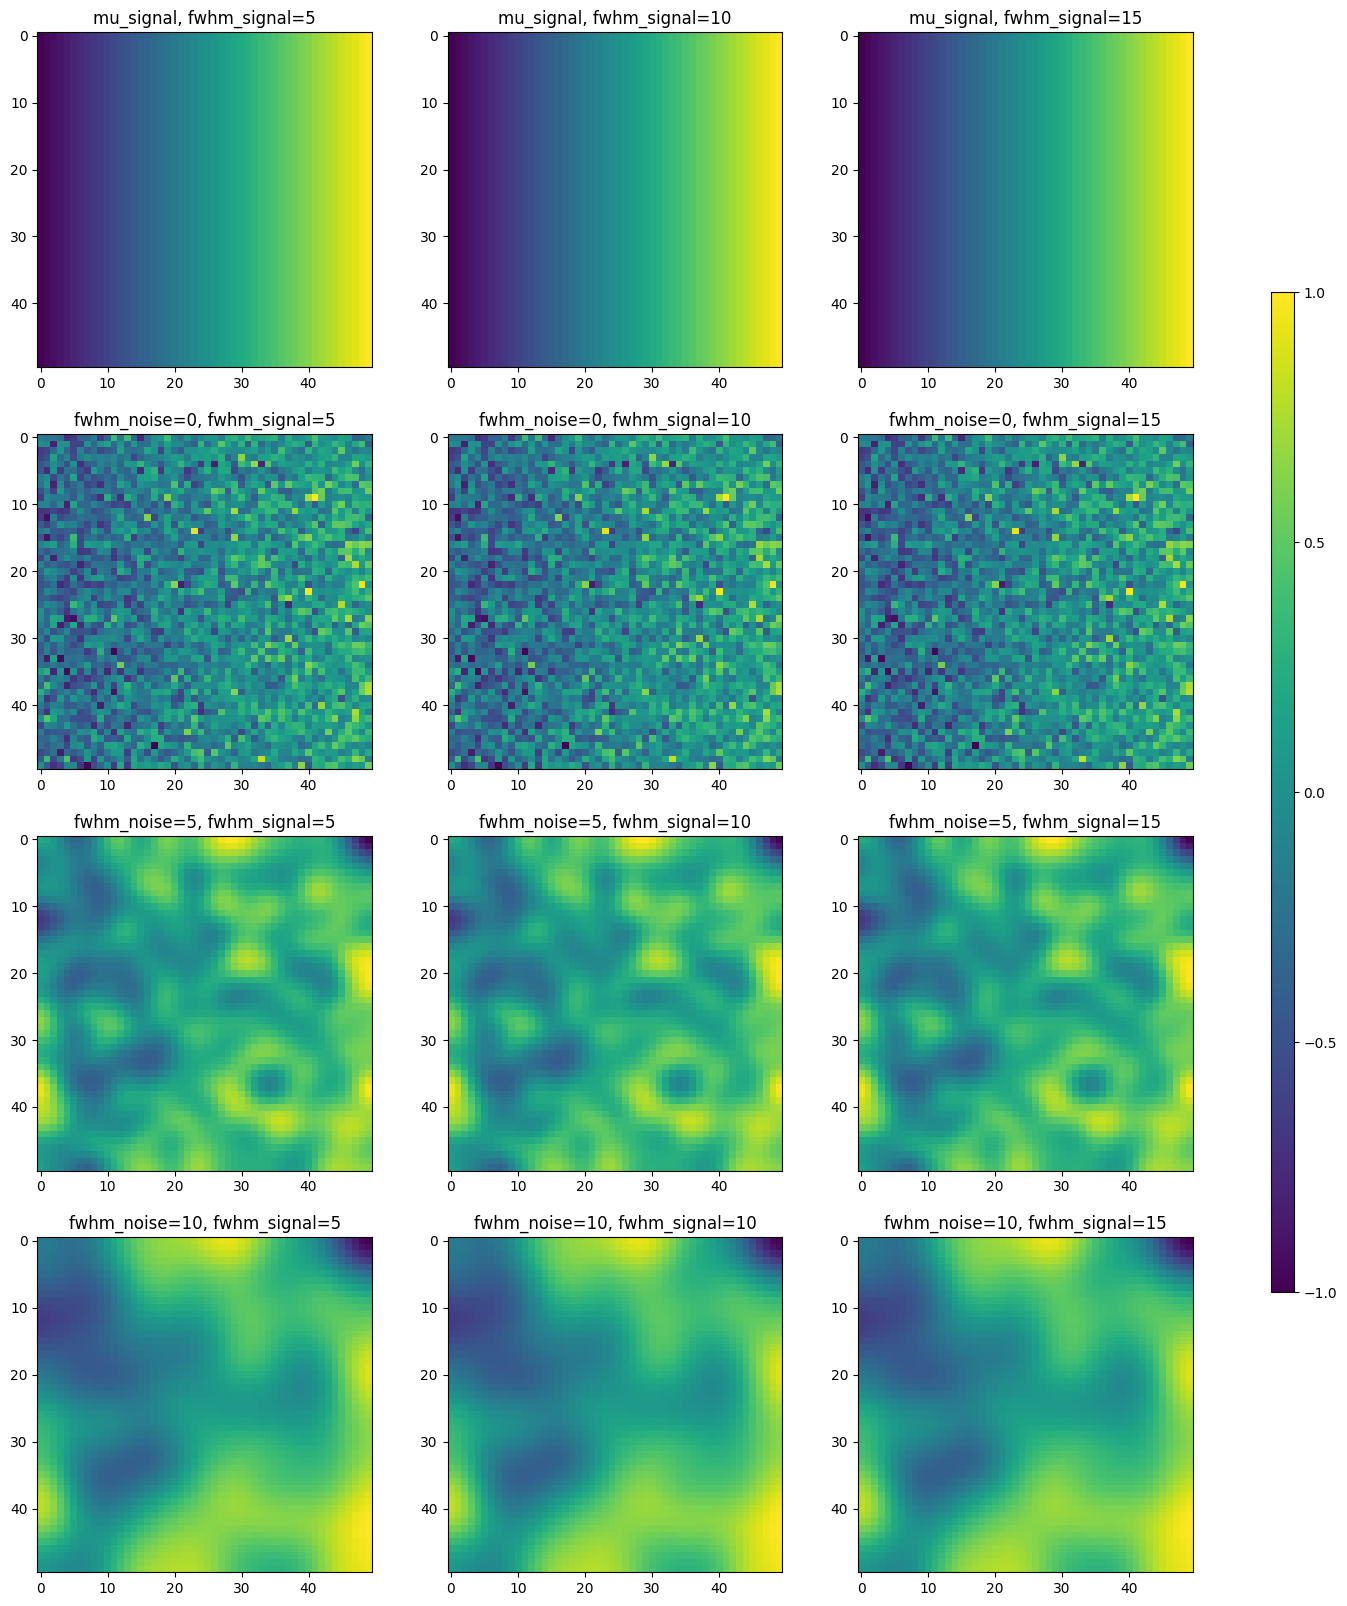

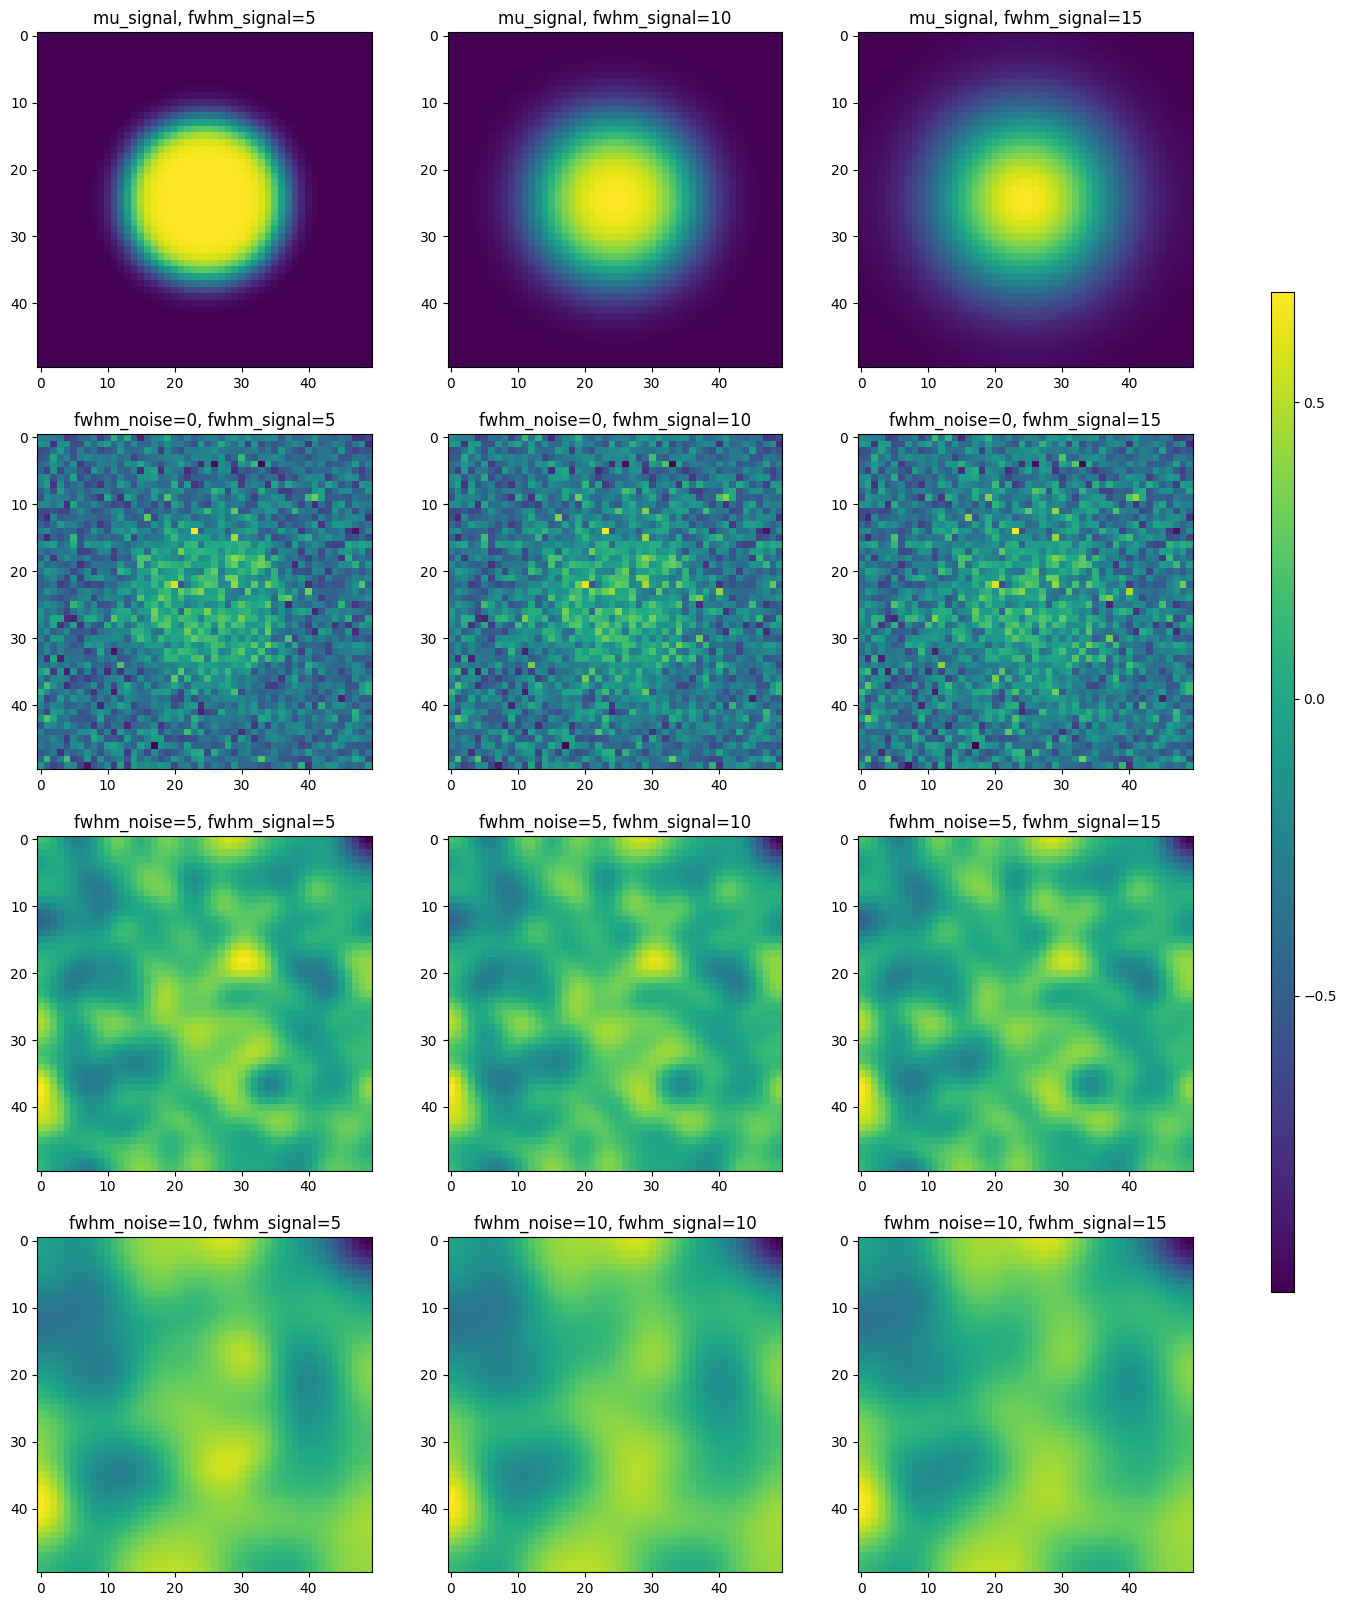

In [17]:
fwhm_signal_vec = [5, 10, 15]
fwhm_noise_vec = [0, 5, 10]

shape_spec_circle = {'r':0.5, 'mag':2,
                    'background_mag':-1,
                    'fwhm_signal': 0,
                    'fwhm_noise': 0,
                    'std': 1 }

shape_spec_step = {'fwhm_signal': 0,
                   'fwhm_noise': 0,
                   'std': 1}

shape_spec_ramp = {'direction': 1,
                  'mag':(-1,1),
                  'fwhm_noise': 0,
               'std': 1}

get_sim_signal(shape="ramp", shape_spec=shape_spec_ramp, fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec)
get_sim_signal(shape="circle", shape_spec=shape_spec_circle, fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec)

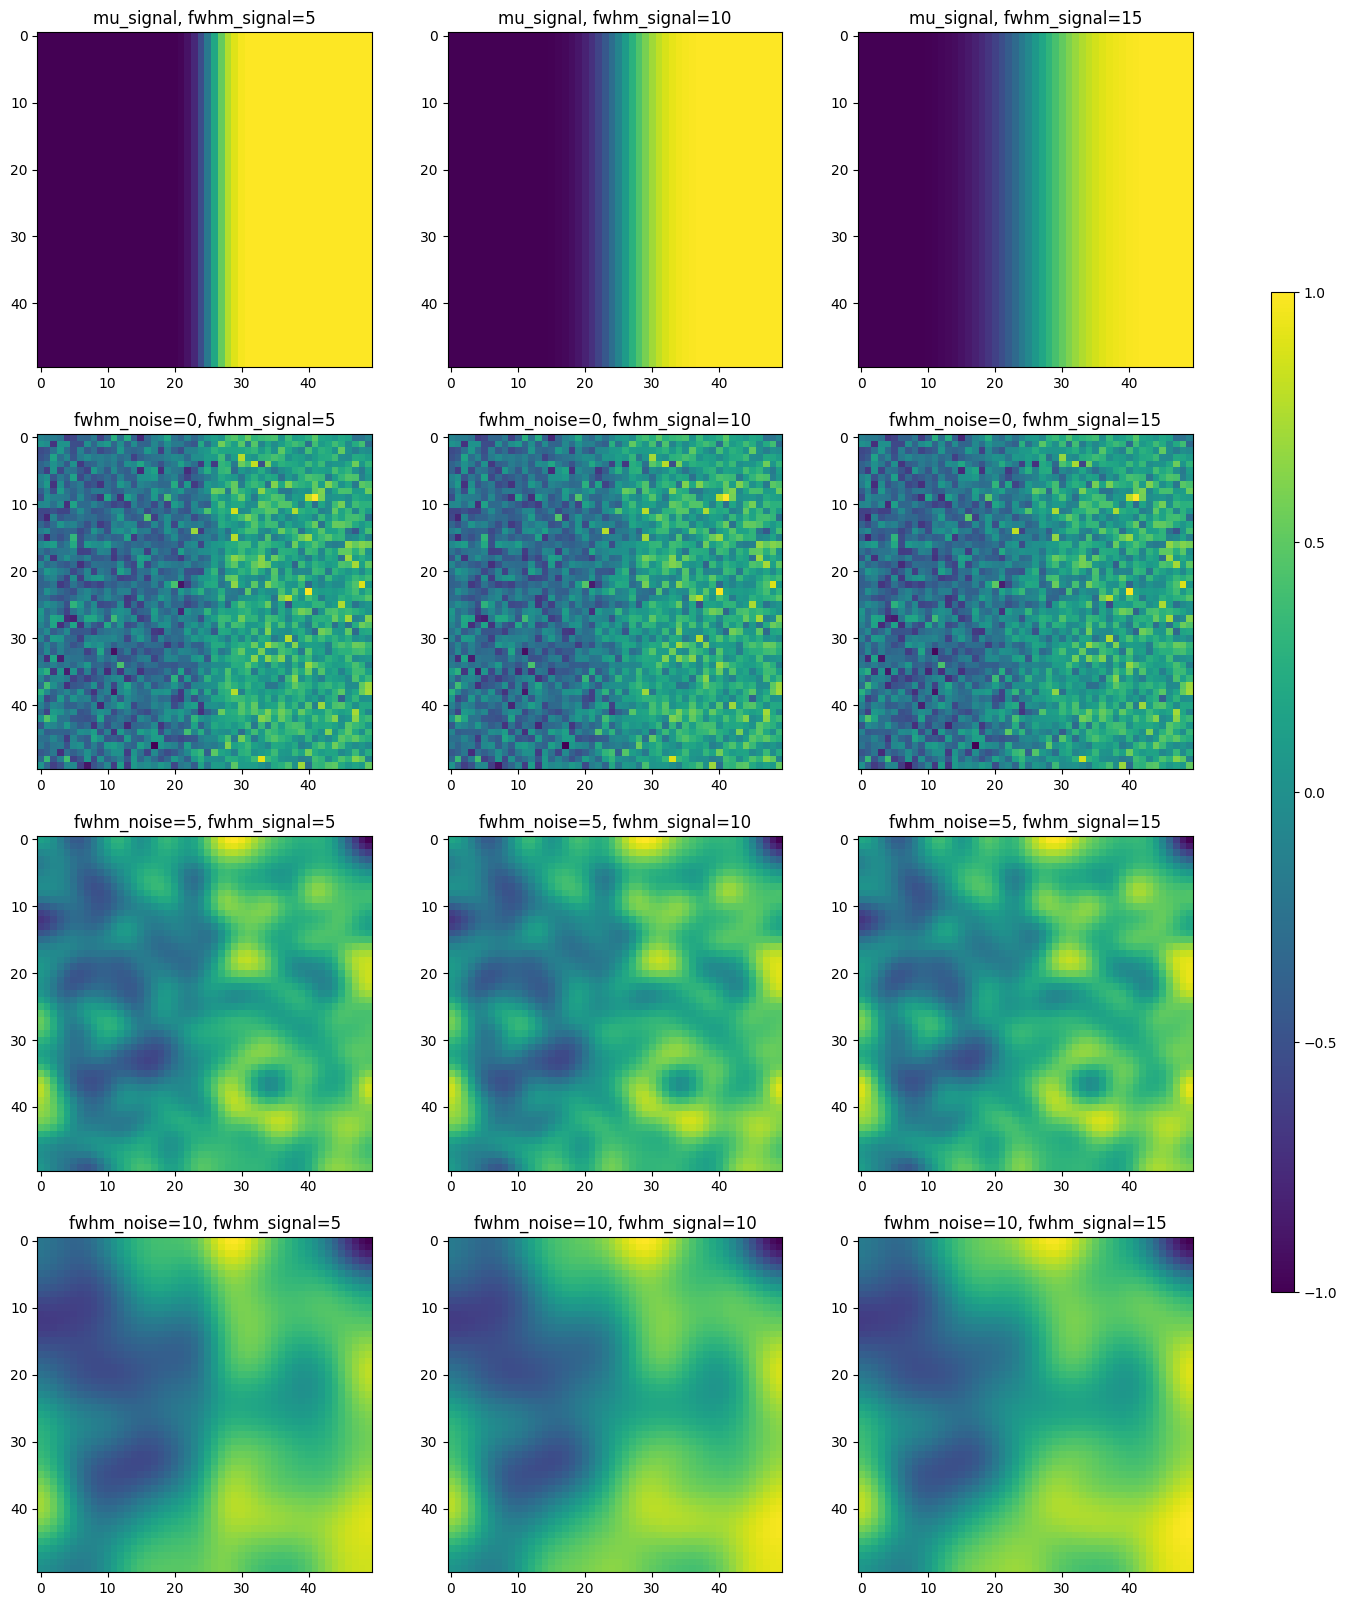

In [18]:
get_sim_signal(shape="step", shape_spec=shape_spec_step, fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec)

## Simulation

In [19]:
fwhm_signal_vec = [5, 10, 15]
fwhm_noise_vec = [0, 5, 10]
sim_num = 1000
figsize = (17, 20)
std = 1

In [6]:
restart_sim = False   # set to TRUE to re-start the simulation
if restart_sim:
    FDR_step = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FDR", shape="step",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                            alpha=0.05,  figsize=figsize)
    with open('FDR_step.pkl', 'wb') as pickle_file:
        pickle.dump(FDR_step, pickle_file)

    FNDR_step = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FNDR", shape="step",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                        alpha=0.05, figsize=figsize)
    with open('FNDR_step.pkl', 'wb') as pickle_file:
        pickle.dump(FNDR_step, pickle_file)

In [20]:
restart_sim = False # set to TRUE to re-start the simulation
if restart_sim:
    FDR_ramp = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FDR", shape="ramp",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                            alpha=0.05, figsize=figsize)
    with open('FDR_ramp.pkl', 'wb') as pickle_file:
        pickle.dump(FDR_ramp, pickle_file)


    FNDR_ramp = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FNDR", shape="ramp",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                        alpha=0.05, figsize=figsize)
    with open('FNDR_ramp.pkl', 'wb') as pickle_file:
        pickle.dump(FNDR_ramp, pickle_file)

In [21]:
restart_sim = False # set to TRUE to re-start the simulation
if restart_sim:
    FDR_circle = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FDR", shape="circle",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                            alpha=0.05,  figsize=figsize)
    with open('FDR_circle.pkl', 'wb') as pickle_file:
        pickle.dump(FDR_circle, pickle_file)
    FNDR_circle = sim_threshold(sim_num=sim_num, c=np.linspace(-2, 2, num=21), mode="FNDR", shape="circle",
                    fwhm_signal_vec=fwhm_signal_vec, fwhm_noise_vec=fwhm_noise_vec, std=std,
                        alpha=0.05, figsize=figsize)
    with open('FNDR_circle.pkl', 'wb') as pickle_file:
        pickle.dump(FNDR_circle, pickle_file)


## Simulation: plotting

Load the pickle simulation result data

In [23]:
with open('sim_result/FDR_circle.pkl', 'rb') as f:
    FDR_circle_sim = pickle.load(f)
with open('sim_result/FDR_step.pkl', 'rb') as f:
    FDR_step_sim = pickle.load(f)
with open('sim_result/FDR_ramp.pkl', 'rb') as f:
    FDR_ramp_sim = pickle.load(f)

with open('sim_result/FNDR_circle.pkl', 'rb') as f:
    FNDR_circle_sim = pickle.load(f)
with open('sim_result/FNDR_step.pkl', 'rb') as f:
    FNDR_step_sim = pickle.load(f)
with open('sim_result/FNDR_ramp.pkl', 'rb') as f:
    FNDR_ramp_sim = pickle.load(f)

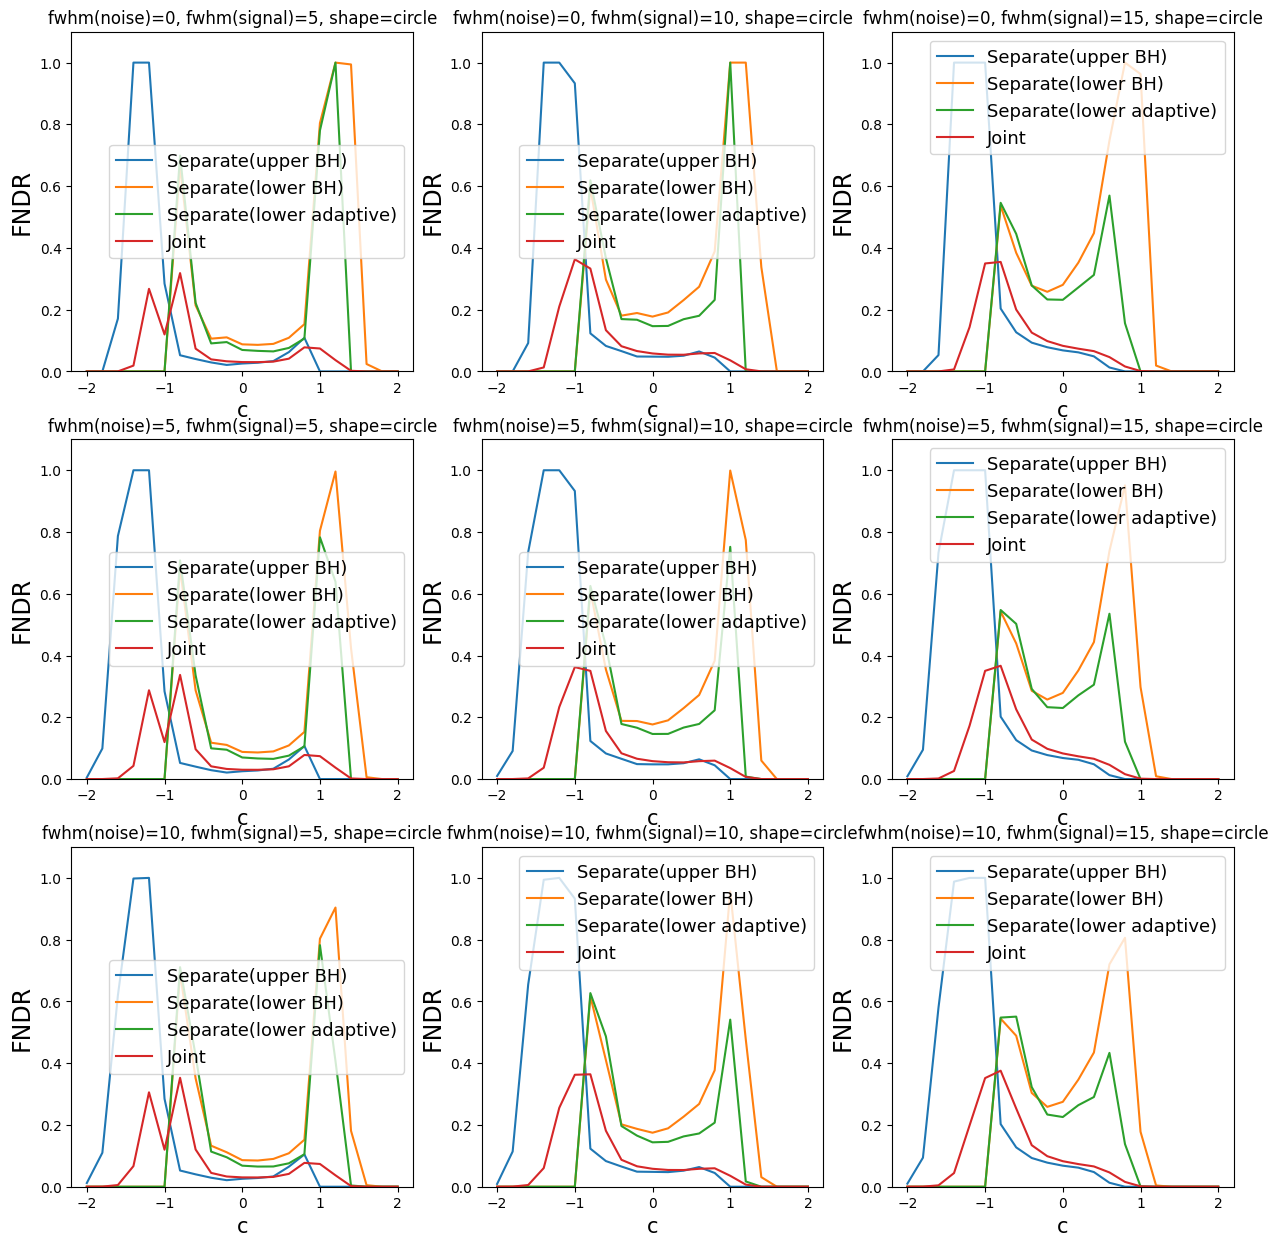

In [24]:
# choose from above and set the correct "shape" option for plot title, and "FDR" for plotting.
sim_plot_all(FNDR_circle_sim, figsize=(15,15), fontsize = 15, FDR = False, shape = "circle") 

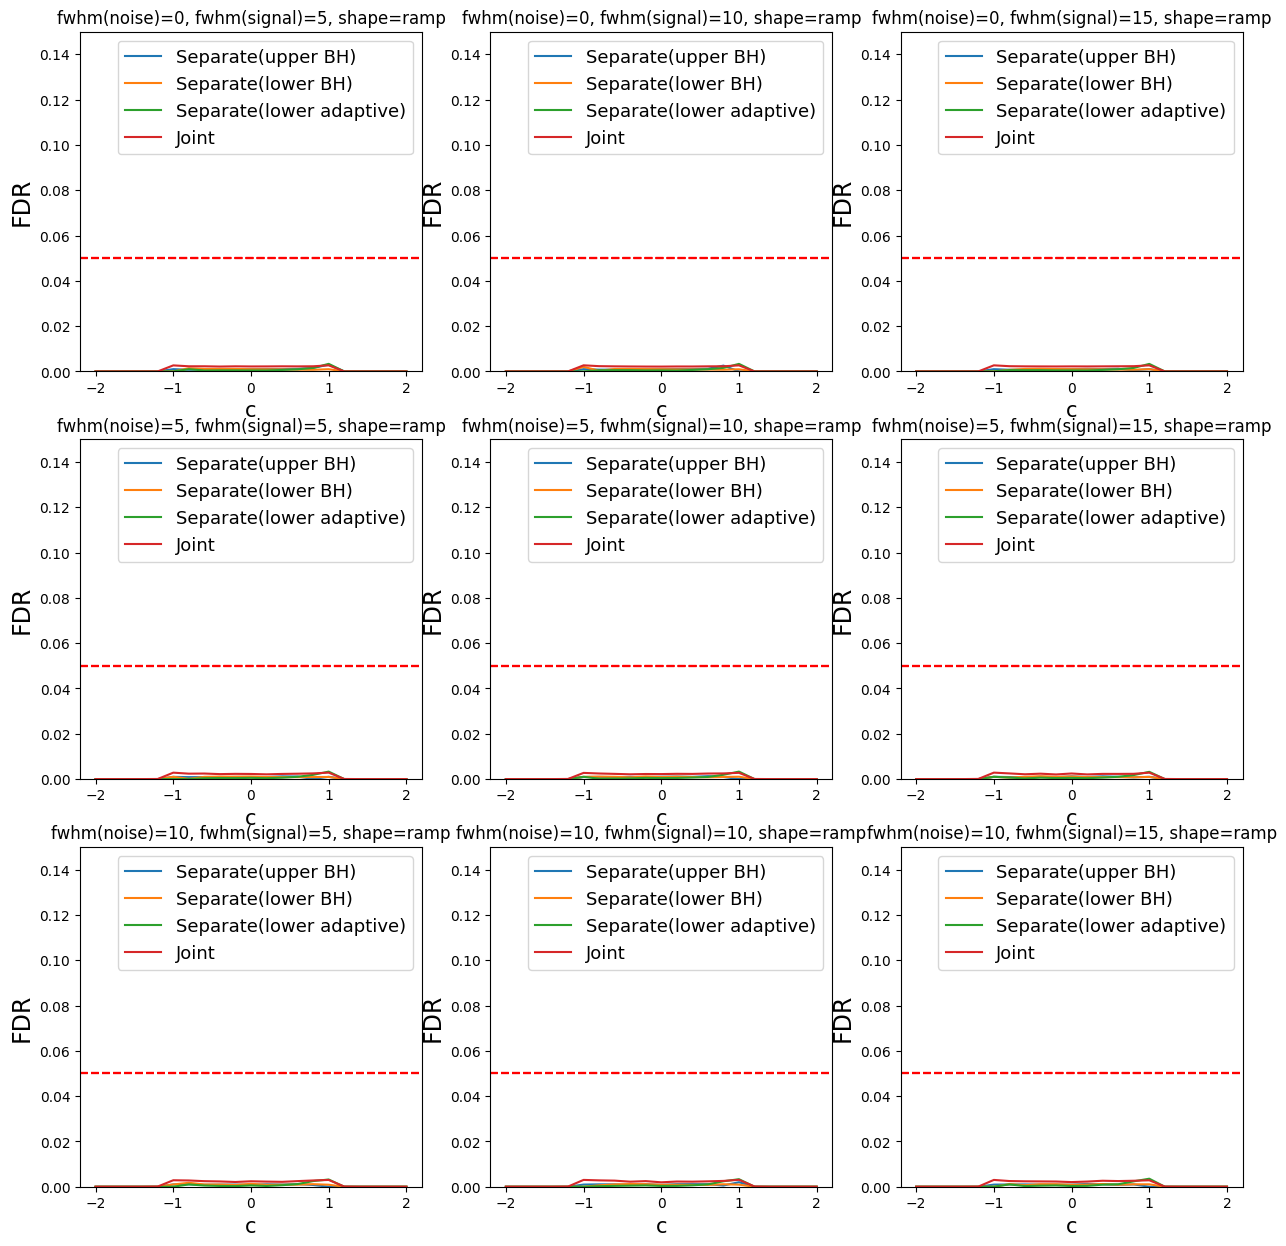

In [25]:
# choose from above and set the correct "shape" option for plot title, and "FDR" for plotting.
sim_plot_all(FDR_ramp_sim, figsize=(15,15), fontsize = 15, FDR = True, shape = "ramp") 